<a href="https://colab.research.google.com/github/zhuhfcod/capstone/blob/main/CNN_image_only_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model using image feature

In this part, we would like to use CNN to solve the image-only news classification task. This part will include data cleaning, data processing  and image enhancement for image data, fine-tuning for the CNN model, final evaluation of the model and some error analysis

### import package

In [ ]:
#importing Libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import resnet50
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import shutil as shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/capstone/dataset/train/image"
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/capstone/dataset/train/image'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
IMG_HEIGHT = 60
IMG_WIDTH = 60
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(path))
NUM_CATEGORIES

5

### Data processing and data cleaning

In [ ]:
classes = { 1:'Business',
            2:'Entertainment', 
            3:'Politics', 
            4:'Sport', 
            5:'Technology'}

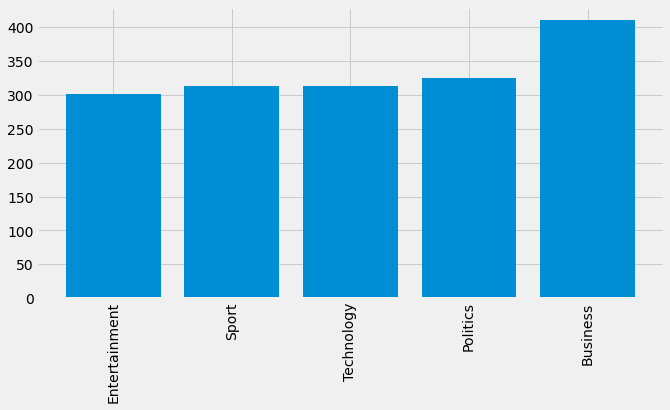

In [ ]:
folders = os.listdir(path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(10,5))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

plt.figure(figsize=(25,25))




<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [ ]:
image_data = []
image_labels = []
path = "/content/drive/MyDrive/capstone/dataset/train/image"
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"


for i in range(NUM_CATEGORIES):
    paths = path + '/' + str(i+1)
    images = os.listdir(paths)
    print(images)

    for img in images:
        try:
            image = cv2.imread(paths + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            a = 1
            #print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

['1149.jpg', '1234.jpg', '1458.jpg', '1296.jpg', '1219.jpg', '1101.jpg', '1408.jpg', '1245.jpg', '1073.jpg', '1265.jpg', '1207.jpg', '1485.jpg', '1248.jpg', '1272.jpg', '1471.jpg', '1257.jpg', '1255.jpg', '1413.jpg', '1464.jpg', '1145.jpg', '1152.jpg', '1020.jpg', '1226.jpg', '1491.jpg', '1360.jpg', '1440.jpg', '1049.jpg', '1083.jpg', '1407.jpg', '1434.jpg', '1510.jpg', '1157.jpg', '1277.jpg', '1335.jpg', '1330.jpg', '1055.jpg', '1282.jpg', '1323.jpg', '1473.jpg', '1059.jpg', '1283.jpg', '1258.jpg', '1450.jpg', '1169.jpg', '1364.jpg', '1061.jpg', '1318.jpg', '1105.jpg', '1378.jpg', '1465.jpg', '1293.jpg', '1124.jpg', '1216.jpg', '1215.jpg', '1192.jpg', '1171.jpg', '1017.jpg', '1477.jpg', '1128.jpg', '1358.jpg', '1254.jpg', '1486.jpg', '1470.jpg', '1285.jpg', '1327.jpg', '1463.jpg', '1139.jpg', '1329.jpg', '1349.jpg', '1002.jpg', '1262.jpg', '1212.jpg', '1420.jpg', '1156.jpg', '1337.jpg', '1040.jpg', '1047.jpg', '1461.jpg', '1177.jpg', '1509.jpg', '1505.jpg', '1347.jpg', '1428.jpg', '10

### Training CNN model and fine-tuning

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (1295, 60, 60, 3)
X_valid.shape (324, 60, 60, 3)
y_train.shape (1295,)
y_valid.shape (324,)


In [ ]:
image2_data = []
image2_labels = []
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"

for i in range(NUM_CATEGORIES):
    paths2 = path2 + '/' + str(i+1)
    images2 = os.listdir(paths2)
    print(images2)

    for img in images2:
      try:
        image = cv2.imread(paths2 + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image2_data.append(np.array(resize_image))
        image2_labels.append(i)
      except:
        a = 1
        #print("Error in " + img)
X_test = np.array(image2_data)
y_test = np.array(image2_labels)

X_test = X_test/255 

['1170.jpg', '1068.jpg', '1135.jpg', '1489.jpg', '1103.jpg', '1229.jpg', '1198.jpg', '1447.jpg', '1056.jpg', '1481.jpg', '1375.jpg', '1116.jpg', '1045.jpg', '1396.jpg', '1123.jpg', '1496.jpg', '1376.jpg', '1279.jpg', '1172.jpg', '1402.jpg', '1167.jpg', '1339.jpg', '1393.jpg', '1341.jpg', '1097.jpg', '1202.jpg', '1400.jpg', '1162.jpg', '1235.jpg', '1359.jpg', '1488.jpg', '1487.jpg', '1242.jpg', '1038.jpg', '1292.jpg', '1406.jpg', '1256.jpg', '1037.jpg', '1046.jpg', '1078.jpg', '1251.jpg', '1421.jpg', '1350.jpg', '1308.jpg', '1220.jpg', '1224.jpg', '1382.jpg', '1150.jpg', '1210.jpg', '1418.jpg', '1188.jpg', '1351.jpg', '1320.jpg', '1275.jpg', '1161.jpg', '1180.jpg', '1403.jpg', '1154.jpg', '1342.jpg', '1317.jpg', '1218.jpg', '1024.jpg', '1498.jpg', '1141.jpg', '1194.jpg', '1419.jpg', '1356.jpg', '1143.jpg', '1307.jpg', '1411.jpg', '1176.jpg', '1148.jpg', '1357.jpg', '1379.jpg', '1085.jpg', '1142.jpg', '1263.jpg', '1249.jpg', '1361.jpg', '1173.jpg', '1332.jpg', '1314.jpg', '1155.jpg', '10

In [ ]:
shuffle_indexes = np.arange(X_test.shape[0])
np.random.shuffle(shuffle_indexes)
X_test = X_test[shuffle_indexes]
y_test = y_test[shuffle_indexes]

In [ ]:
from keras.utils.np_utils import *

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)
y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(1295, 5)
(324, 5)


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(5, activation='softmax')
])

In [ ]:
lr = 0.0001
epochs = 50

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50
41/41 [==============================] - 107s 3s/step - loss: 3.1320 - accuracy: 0.3081 - val_loss: 1.5926 - val_accuracy: 0.2500
Epoch 2/50
41/41 [==============================] - 104s 3s/step - loss: 1.9887 - accuracy: 0.3822 - val_loss: 1.6057 - val_accuracy: 0.2623
Epoch 3/50
41/41 [==============================] - 104s 3s/step - loss: 1.7416 - accuracy: 0.4332 - val_loss: 1.6904 - val_accuracy: 0.2654
Epoch 4/50
41/41 [==============================] - 104s 3s/step - loss: 1.5922 - accuracy: 0.4734 - val_loss: 1.7105 - val_accuracy: 0.2654
Epoch 5/50
41/41 [==============================] - 104s 3s/step - loss: 1.5158 - accuracy: 0.5236 - val_loss: 2.0380 - val_accuracy: 0.2654
Epoch 6/50
41/41 [==============================] - 105s 3s/step - loss: 1.3934 - accuracy: 0.5498 - val_loss: 1.7869 - val_accuracy: 0.2654
Epoch 7/50
41/41 [==============================] - 105s 3s/step - loss: 1.3480 - accuracy: 0.5861 - val_loss: 1.8396 - val_accuracy: 0.2654
Epoch 8/50
41

### Result evaluation and error analysis

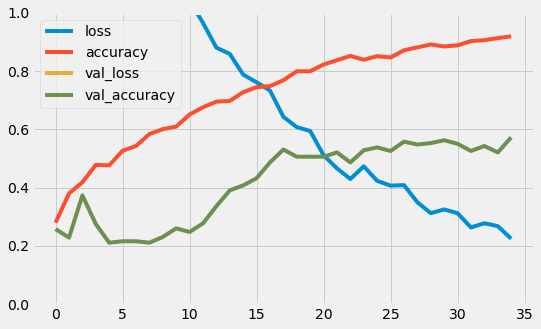

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
image2_data = []
image2_labels = []
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"

for i in range(NUM_CATEGORIES):
    paths2 = path2 + '/' + str(i+1)
    images2 = os.listdir(paths2)
    print(images2)

    for img in images2:
      try:
        image = cv2.imread(paths2 + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image2_data.append(np.array(resize_image))
        image2_labels.append(i)
      except:
        a = 1
        #print("Error in " + img)
X_test = np.array(image2_data)

In [ ]:
pred = model.predict(X_test)
classes_x=np.argmax(pred,axis=1)
image_labels=np.argmax(y_test ,axis=1)

print('Test Data accuracy: ', accuracy_score(image_labels, classes_x)*100)

Test Data accuracy:  57.24815724815725


In [ ]:
model.save('CNNnews.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(image_labels, classes_x)

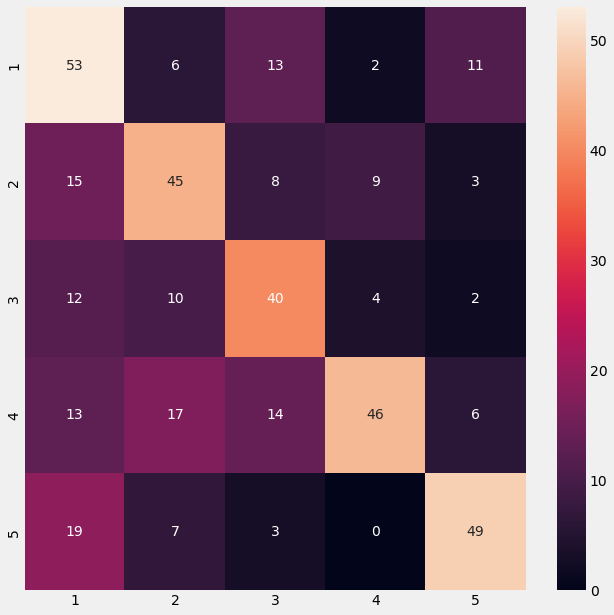

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

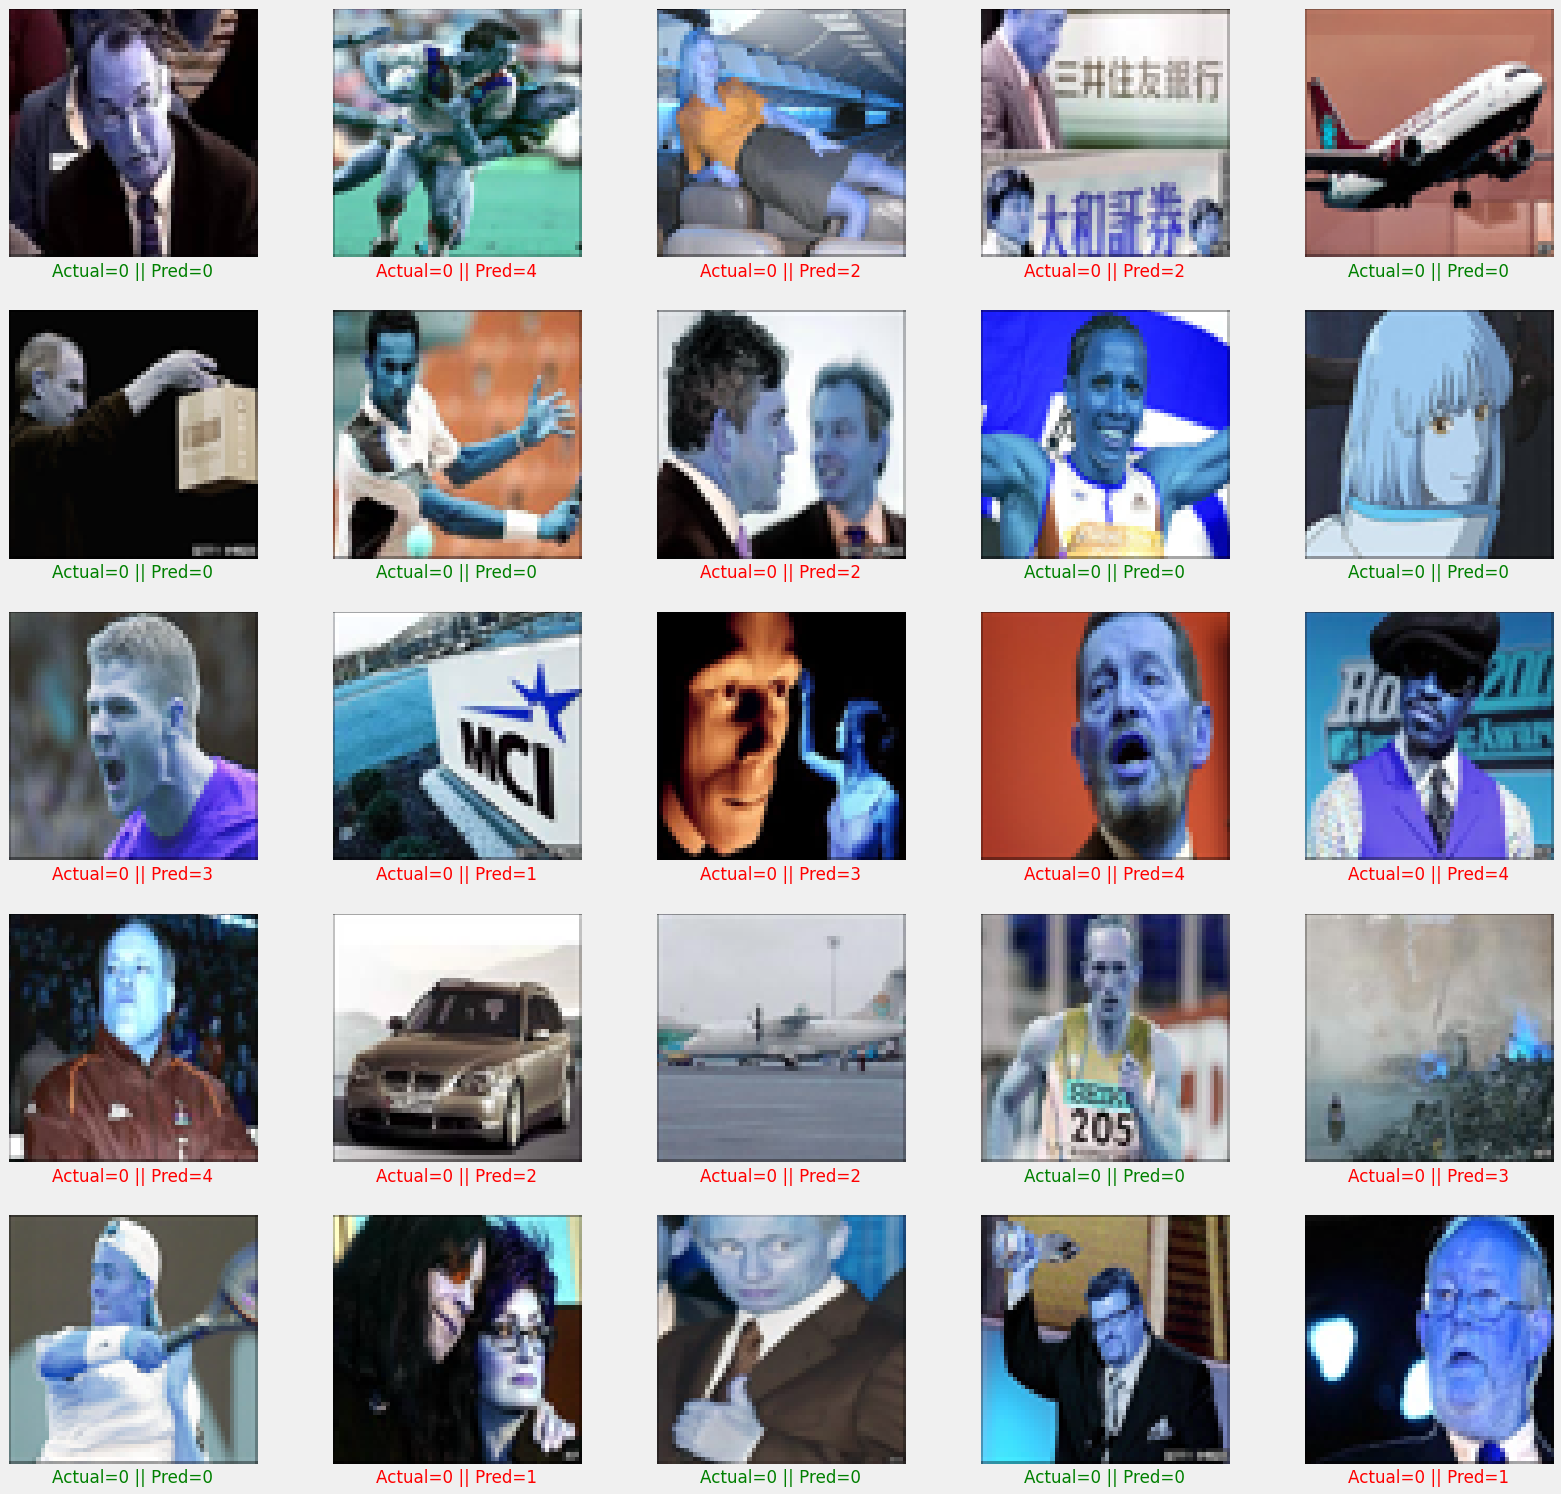

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = image2_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()